In [1]:
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

## Carregando Base de Dados

In [2]:
X, y = load_diabetes(return_X_y=True, as_frame=True, scaled=True)
X.shape, y.shape

((442, 10), (442,))

## Análise Exploratória

In [3]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [4]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [5]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [6]:
any(X.isna().sum())

False

# Preparação dos dados

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333
...,...,...,...,...,...,...,...,...,...,...
437,0.683333,1.0,0.421488,0.704225,0.431373,0.359562,0.259740,0.282087,0.605672,0.530303
438,0.466667,1.0,0.285124,0.183099,0.627451,0.619522,0.259740,0.423131,0.415810,0.666667
439,0.683333,1.0,0.285124,0.530563,0.318627,0.323705,0.272727,0.249647,0.305030,0.560606
440,0.283333,0.0,0.495868,0.464789,0.509804,0.416335,0.259740,0.393512,0.657026,0.409091


# Metodo do cotovelo
O método do cotovelo (Elbow Method) é uma técnica comum utilizada na análise de agrupamento (clustering) para ajudar a determinar o número ideal de clusters em um conjunto de dados.

## Escolha do algorítmo de agrupamento:
Começamos escolhendo um algorítmo de agrupamento para o nosso modelo, os algorítmos mais comúns são K-Means, Hierarchical Clustering, e DBSCAN.

#### 1 - K-Means:

**Quando usar:** K-Means é frequentemente usado quando se assume que os clusters são esféricos e de tamanho aproximadamente igual. É eficaz em dados numéricos e em conjuntos de dados onde a forma e o tamanho dos clusters são razoavelmente uniformes.

**Observações:** Pode ser sensível à inicialização dos centróides, e a escolha inicial pode afetar os resultados. Pode não funcionar bem em clusters de formas irregulares ou tamanhos muito diferentes.

---
#### 2 - Hierarchical Clustering:

**Quando usar:** Hierarchical Clustering é útil quando a estrutura hierárquica dos clusters é relevante. Pode ser aplicado em diversos tipos de dados e é menos sensível à escolha do número de clusters.

**Observações:** Pode ser computacionalmente mais intensivo, especialmente em grandes conjuntos de dados. A interpretação de dendrogramas pode ser subjetiva.

---
#### 3 - DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

**Quando usar:** DBSCAN é eficaz na identificação de clusters de forma arbitrária e não requer a especificação prévia do número de clusters. É robusto em relação à densidade dos clusters.

**Observações:** Pode ter dificuldades com clusters de densidades muito diferentes. A escolha dos parâmetros (raio e número mínimo de pontos) é crucial.

---
#### 4 - Gaussian Mixture Model (GMM):

**Quando usar:** GMM é adequado quando os dados são gerados a partir de uma mistura de distribuições gaussianas. É mais flexível em termos de forma dos clusters.

**Observações:** Sensível à inicialização e pode convergir para um mínimo local. Funciona bem quando os clusters têm formas mais complexas e não são esféricos.

---
#### 5 - Agglomerative Clustering:

**Quando usar:** Agglomerative Clustering é útil quando a estrutura hierárquica é desejada e quando não é necessário especificar o número de clusters antecipadamente.

**Observações:** Pode ser computacionalmente caro para grandes conjuntos de dados. A interpretação da árvore de clusters pode ser subjetiva.

---

## K-Means

### Cálculo da Soma dos Quadrados Dentro dos Clusters (WCSS)
Para cada valor de k, calcule a soma dos quadrados dentro dos clusters (WCSS), que representa a variabilidade dentro dos clusters. WCSS é a métrica que o K-means tenta minimizar.

In [10]:
inertias    = []
distortions = []

for k in range(1, 20):
    model = KMeans(n_clusters=k, n_init="auto").fit(X)
    inertias.append(model.inertia_)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

* **Distorção** é uma medida de quão dispersos estão os clusters. O K-means tenta minimizá-la também.

A distorção concentra-se na compacidade dos clusters individuais. Ela é sensível à proximidade ou dispersão dos pontos dentro de cada cluster.

* **Inércia** (WCSS) considera a dispersão geral dos pontos em todo o conjunto de dados. Mede quão bem separados os clusters estão entre si.

Resultado do cálculo da soma dos quadrados dentro dos clusters. Isso representa a variabiliade dentro dos clusters e o KMeans tenta minimizar

In [11]:
for k in range(0, 19):
    print(f"k{k+1}: inercia: {round(inertias[k],3)}   distorção: {round(distortions[k],3)}")

k1: inercia: 240.612   distorção: 0.729
k2: inercia: 124.299   distorção: 0.506
k3: inercia: 109.633   distorção: 0.475
k4: inercia: 89.725   distorção: 0.433
k5: inercia: 85.252   distorção: 0.422
k6: inercia: 79.828   distorção: 0.409
k7: inercia: 75.796   distorção: 0.397
k8: inercia: 73.137   distorção: 0.39
k9: inercia: 69.618   distorção: 0.38
k10: inercia: 67.061   distorção: 0.374
k11: inercia: 64.082   distorção: 0.366
k12: inercia: 63.214   distorção: 0.363
k13: inercia: 59.908   distorção: 0.353
k14: inercia: 58.819   distorção: 0.351
k15: inercia: 57.866   distorção: 0.348
k16: inercia: 55.955   distorção: 0.34
k17: inercia: 55.063   distorção: 0.339
k18: inercia: 53.519   distorção: 0.334
k19: inercia: 52.921   distorção: 0.332


### Plotagem do Gráfico WCSS vs. Número de Clusters:
Plote um gráfico que mostra o valor de WCSS em função do número de clusters (k).

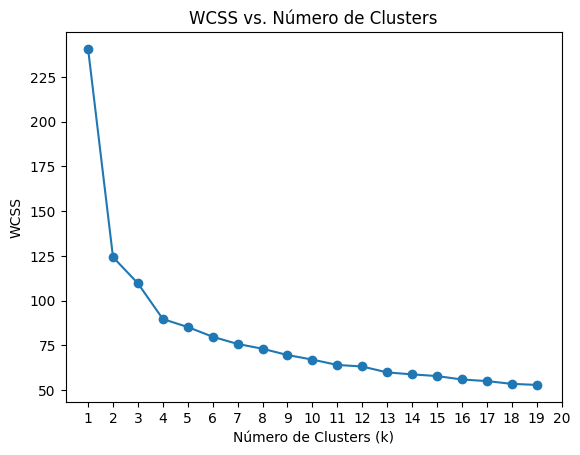

In [12]:
plt.plot(range(1, 20), inertias, marker='o')
plt.title('WCSS vs. Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 21, 1))
plt.show()

O ponto de cotovelo é identificado quando o número ótimo de clusters, determinado pela análise da métrica de avaliação (por exemplo, distorção ou inércia), é igual a **4**.

## DBSCAN

In [52]:
eps_values = [0.1, 0.5, 1.0, 1.5]
min_samples_values = [3, 5, 10, 15]

avg_distances = []
rotulos = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        if dbscan.components_.any():
            print(dbscan.components_.mean())
            avg_distance = dbscan.components_.mean()  # Exemplo de métrica, pode ser ajustada
            avg_distances.append(avg_distance)
            rotulos.append(f'{eps}-{min_samples}')

0.4211948984258425
0.4194500582925145
0.4134374584815932
0.41014973592172144
0.42279976081557114
0.42279976081557114
0.42279976081557114
0.42279976081557114
0.42279976081557114
0.42279976081557114
0.42279976081557114
0.42279976081557114


In [53]:
avg_distances

[0.4211948984258425,
 0.4194500582925145,
 0.4134374584815932,
 0.41014973592172144,
 0.42279976081557114,
 0.42279976081557114,
 0.42279976081557114,
 0.42279976081557114,
 0.42279976081557114,
 0.42279976081557114,
 0.42279976081557114,
 0.42279976081557114]

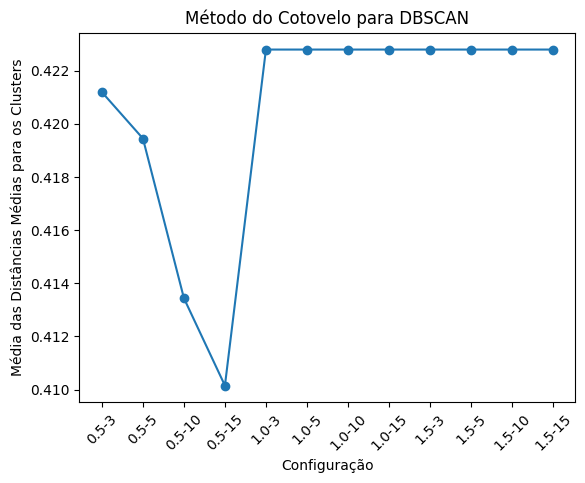

In [54]:
plt.plot(rotulos, avg_distances, marker='o')
plt.xlabel('Configuração')
plt.xticks(rotation=45)
plt.ylabel('Média das Distâncias Médias para os Clusters')
plt.title('Método do Cotovelo para DBSCAN')
plt.show()

## Hierárquico/Aglomerativo

# Metodo Silhueta

O método da silhueta (Silhouette Method) é uma técnica de avaliação de cluster que mede quão bem um objeto se encaixa no seu próprio cluster em comparação com outros clusters. Essencialmente, ele fornece uma medida de quão semelhantes são os objetos dentro de um cluster e quão bem definidos são os limites entre os clusters. O valor da silhueta varia de -1 a 1, onde um valor mais alto indica uma melhor qualidade de agrupamento.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

## K-Means

In [14]:
silhouette_scores = []
for k in range(2, 20):
    # Inicializar o modelo de clustering (por exemplo, K-Means)
    model = KMeans(n_clusters=k, n_init="auto")
    cluster_labels = model.fit_predict(X)

    # Calcular o score da silhueta para o conjunto de dados
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

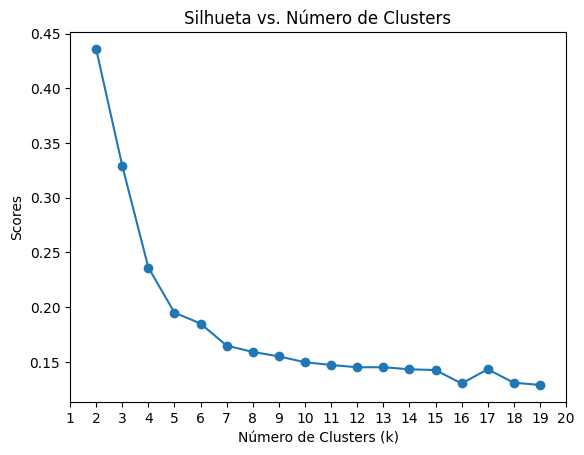

In [17]:
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhueta vs. Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Scores')
plt.xticks(np.arange(1, 21, 1))
plt.show()

## DBSCAN

A métrica da silhueta pode ser aplicada ao DBSCAN, mas você deve ter em mente que os rótulos atribuídos pelo DBSCAN incluem pontos que são considerados como ruído (-1). A métrica de silhueta é mais significativa para pontos que estão efetivamente atribuídos a clusters.

In [48]:
eps_values = [0.5, 1.0]
min_samples_values = [3, 5, 10, 15]

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(X)
        silhouette_avg = silhouette_score(X, labels)
        print(f"{eps}-{min_samples}: avg: {silhouette_avg}")

0.5-3: avg: 0.39800898088714065
0.5-5: avg: 0.39800898088714065
0.5-10: avg: 0.39800898088714065
0.5-15: avg: 0.3977720178311146
1.0-3: avg: 0.43611432828588437
1.0-5: avg: 0.43611432828588437
1.0-10: avg: 0.43611432828588437
1.0-15: avg: 0.43611432828588437


## Hierárquico/Aglomerativo

# Representação

In [55]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=2, svd_solver='full')
X_pca = pca.fit_transform(X)

In [86]:
n_clusters = 4

In [87]:
kmeans = KMeans(n_clusters=n_clusters, n_init="auto")  # Escolha o número desejado de clusters
kmeans.fit(X_pca)
labels_kmeans = kmeans.labels_

In [88]:
dbscan = DBSCAN(eps=0.5, min_samples=15)
labels_dbscan = dbscan.fit_predict(X_pca)

In [90]:
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
labels_hierarchical = hierarchical.fit_predict(X_pca)

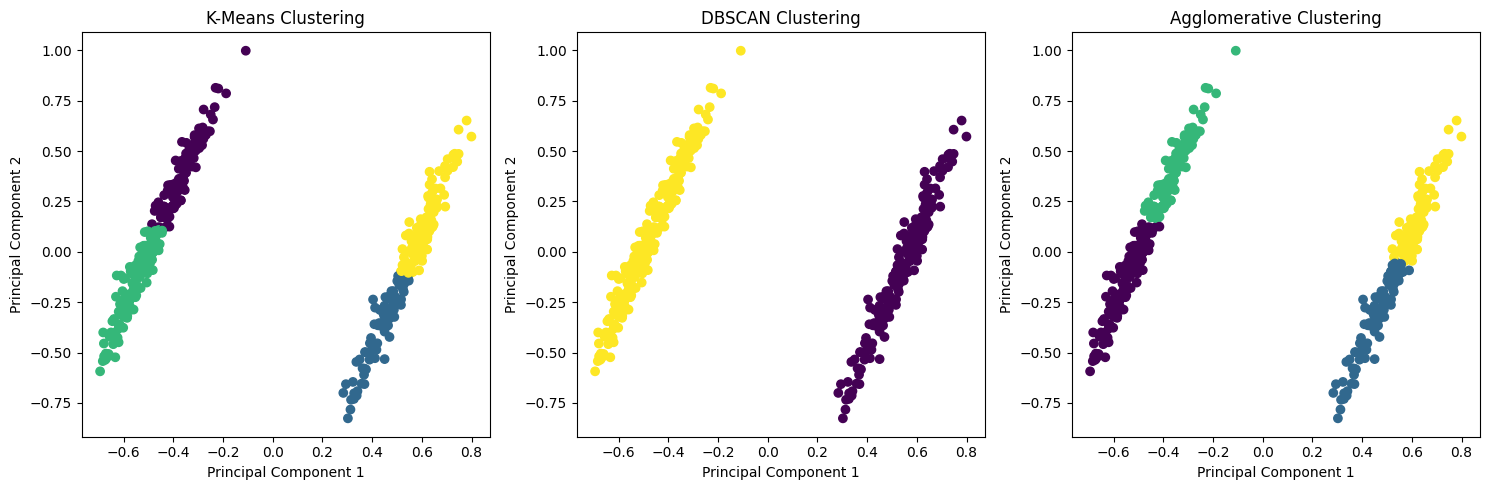

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotar K-Means
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis')
axes[0].set_title('K-Means Clustering')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plotar DBSCAN
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbscan, cmap='viridis')
axes[1].set_title('DBSCAN Clustering')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Plotar Hierárquico/Aglomerativo
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hierarchical, cmap='viridis')
axes[2].set_title('Agglomerative Clustering')
axes[2].set_xlabel('Principal Component 1')
axes[2].set_ylabel('Principal Component 2')

# Ajustar o layout
plt.tight_layout()

# Exibir o gráfico
plt.show()